Подключаем библиотеки и загружаем датасет Titanic из seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import seaborn as sns
df = sns.load_dataset("titanic")

Выбираем нужные столбцы

In [ ]:
columns = ["survived", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]
df = df[columns]

Выводим статистики до обработки

In [ ]:
print("Статистика до обработки:")
print(df.describe(include="all"))

Статистика до обработки:
          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  
count   891.000000      889  
un

Визуализируем распределение числовых признаков до обработки

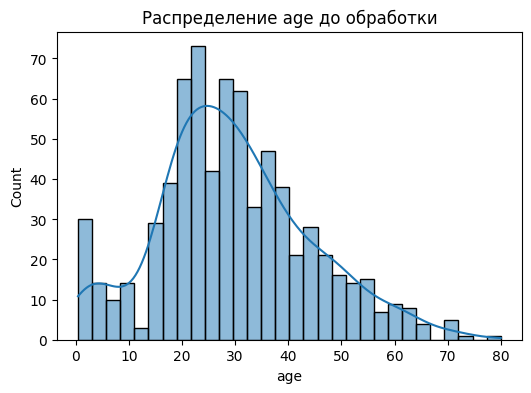

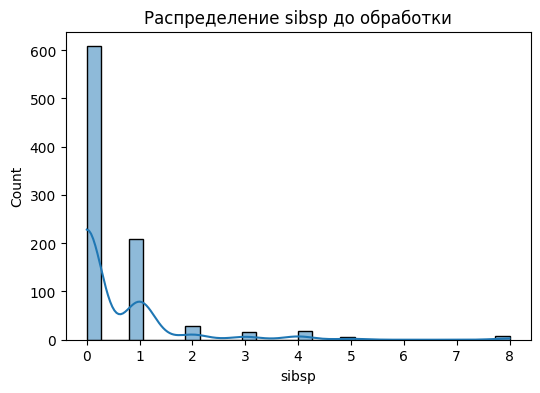

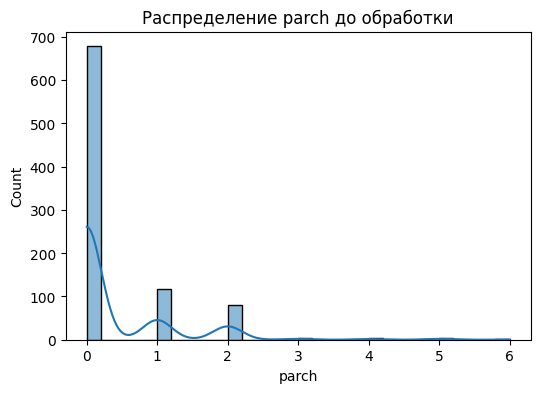

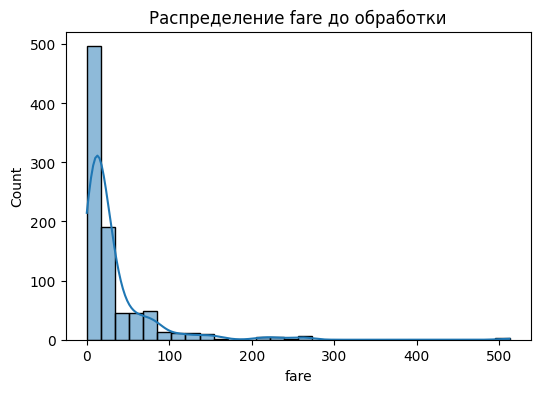

In [ ]:
for col in ["age", "sibsp", "parch", "fare"]:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f'Распределение {col} до обработки')
    plt.show()

Разделяем признаки и целевую переменную

In [ ]:
X = df.drop(columns=["survived"])
y = df["survived"]

Определяем числовые и категориальные признаки

In [ ]:
num_features = ["age", "sibsp", "parch", "fare"]
cat_features = ["pclass", "sex", "embarked"]

Обработчик пропусков для числовых признаков (заполняем средним)

In [ ]:
numeric_imputer = SimpleImputer(strategy="mean")

Обработчик пропусков для категориальных признаков (заполняем самой частой категорией)

In [ ]:
categorical_imputer = SimpleImputer(strategy="most_frequent")

Кодирование категориальных признаков (OneHotEncoding)

In [ ]:
categorical_encoder = OneHotEncoder(handle_unknown="ignore")

Масштабирование числовых признаков

In [ ]:
scaler = StandardScaler()

Создаем пайплайн для числовых данных

In [ ]:
numeric_pipeline = Pipeline([
    ("imputer", numeric_imputer),
    ("scaler", scaler)
])

Создаем пайплайн для категориальных данных

In [ ]:
categorical_pipeline = Pipeline([
    ("imputer", categorical_imputer),
    ("encoder", categorical_encoder)
])

Объединяем обработчики

In [ ]:
preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, num_features),
    ("cat", categorical_pipeline, cat_features)
])

Преобразуем данные

In [ ]:
X_processed = preprocessor.fit_transform(X)

Выводим размерность итогового массива

In [ ]:
print("Размерность обработанных данных:", X_processed.shape)

Размерность обработанных данных: (891, 12)


Выводим статистики после обработки

In [ ]:
processed_df = pd.DataFrame(X_processed)
print("Статистика после обработки:")
print(processed_df.describe())

Статистика после обработки:
                 0             1             2             3           4   \
count  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02  891.000000   
mean   2.232906e-16  4.386066e-17  5.382900e-17  3.987333e-18    0.242424   
std    1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00    0.428790   
min   -2.253155e+00 -4.745452e-01 -4.736736e-01 -6.484217e-01    0.000000   
25%   -5.924806e-01 -4.745452e-01 -4.736736e-01 -4.891482e-01    0.000000   
50%    0.000000e+00 -4.745452e-01 -4.736736e-01 -3.573909e-01    0.000000   
75%    4.079260e-01  4.327934e-01 -4.736736e-01 -2.424635e-02    0.000000   
max    3.870872e+00  6.784163e+00  6.974147e+00  9.667167e+00    1.000000   

               5           6           7           8           9           10  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.206510    0.551066    0.352413    0.647587    0.188552    0.086420   
std      0.405028    0.497665    0.

Визуализируем распределение числовых признаков после обработки

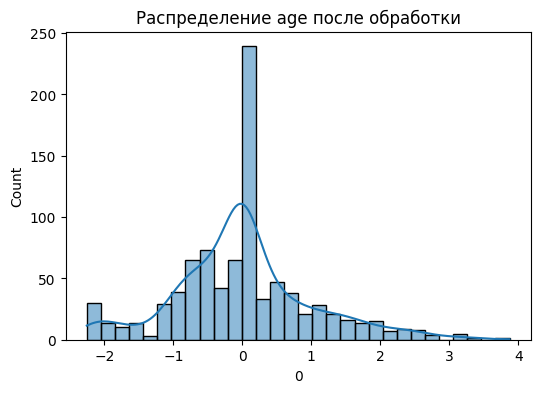

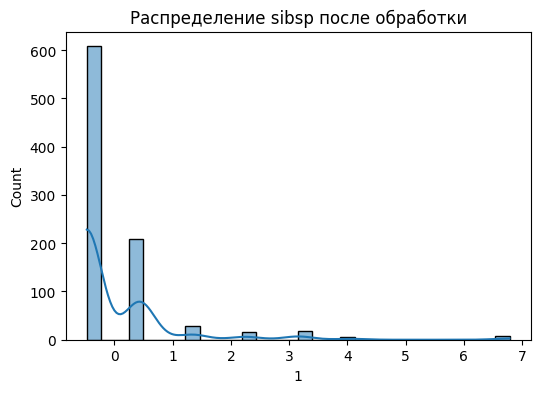

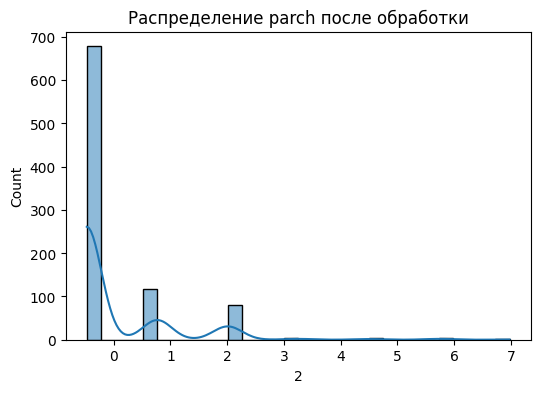

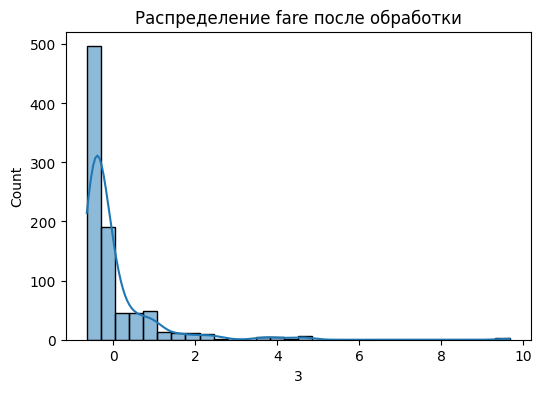

In [ ]:
for i, col in enumerate(num_features):
    plt.figure(figsize=(6, 4))
    sns.histplot(processed_df.iloc[:, i], bins=30, kde=True)
    plt.title(f'Распределение {col} после обработки')
    plt.show()